# 2. Bank Churnrate Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

In the Data Wrangling/Cleaning phase, the dataset provided by the kaggle user needs to assessed for any null values as well as verify if data in columns have appropriate data types and records.

## 2.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to verify/clean the databset provided.

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## 2.4 Load Supply Chain Train Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
bank_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/supply_chain_train.csv')

Auditing the dataset with .info() and .head() displaying the first few records.

In [4]:
#info method on bank_df to see a summary of the data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           8101 non-null   object 
 6   Marital_Status            8101 non-null   object 
 7   Income_Category           8101 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

In [5]:
#head method on bank_df to print the first several rows of the data
bank_df.head()

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,Unknown,Blue,48,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


## 2.5 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [6]:
#Repalce records with 'Unknown' value with null in order to assess number of null values
bank_df.replace('Unknown',np.nan, inplace=True) 

In [8]:
#The statement below came from the ski_data project but is used here as well to calculate number and percent
#of missing values in the dataset.
#Count (using `.isnull.sum()`) 
#as well as the percentages (using `.mean()` instead of `.sum()`).
#Order by using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([bank_df.isnull().sum(), 100 * bank_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Education_Level,1205,14.874707
Income_Category,889,10.973954
Marital_Status,579,7.147266
train_idx,0,0.000000
Credit_Limit,0,0.000000
Avg_Utilization_Ratio,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000


Looking at the dataset: Education Level, Income Category, and Maritial status have null records with about 15% null in Education Level. Now will need to also verify if all columns have "right" type of data.

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

Examining of all categorical features for the dataset.

In [9]:
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
bank_df.select_dtypes(object)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,F,NaN,Single,NaN,Blue
1,F,High School,Married,NaN,Blue
2,F,NaN,Single,Less than $40K,Gold
3,F,Graduate,Single,Less than $40K,Blue
4,F,High School,Married,$40K - $60K,Blue
...,...,...,...,...,...
8096,F,Graduate,Single,$40K - $60K,Blue
8097,F,High School,Divorced,NaN,Blue
8098,F,Graduate,NaN,Less than $40K,Blue
8099,M,NaN,Single,$40K - $60K,Blue


#### 2.6.3.1 Unique Categorical Data<a id='2.6.3.1_Unique_Resort_Names'></a>

In [10]:
#Get all unique entries to categorial data for each column to assess different entry types
bank_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
bank_df['Education_Level'].unique()

array([nan, 'High School', 'Graduate', 'Doctorate', 'Post-Graduate',
       'Uneducated', 'College'], dtype=object)

In [12]:
bank_df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', nan], dtype=object)

In [13]:
bank_df['Income_Category'].unique()

array([nan, 'Less than $40K', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', '$120K +'], dtype=object)

In [14]:
bank_df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

Looking at the dataset, seems all categorical data has different cateogories that match the associated field and does not have different spelling or misspelled record information.

#### 2.6.3.2 Assessing User Base<a id='2.6.3.2_Region_And_State'></a>

The following steps will allow us to retreive information regarding who the majority of users are for this bank.

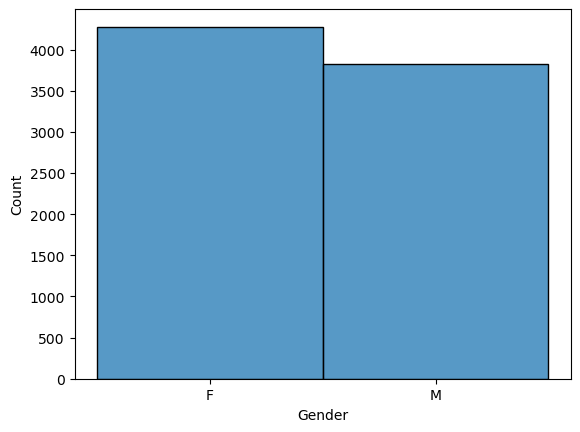

In [15]:
#Plot distribution of Gender
sns.histplot(data=bank_df, x='Gender')
plt.show()

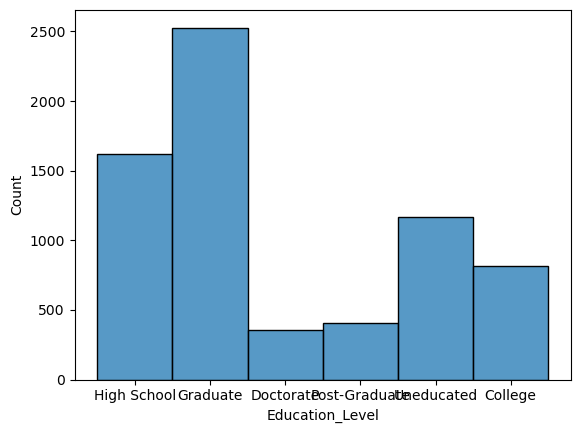

In [16]:
sns.histplot(data=bank_df , x='Education_Level')
plt.show()

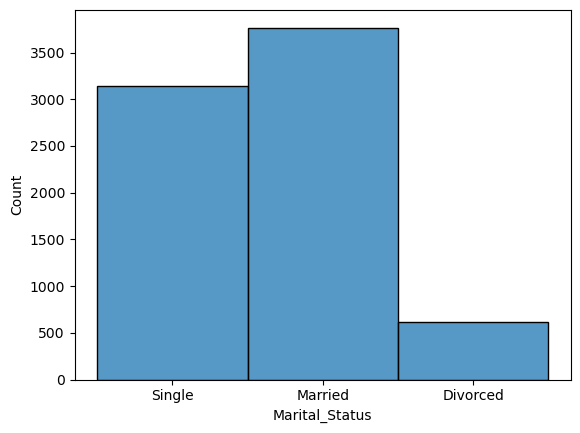

In [17]:
sns.histplot(data=bank_df , x='Marital_Status')
plt.show()

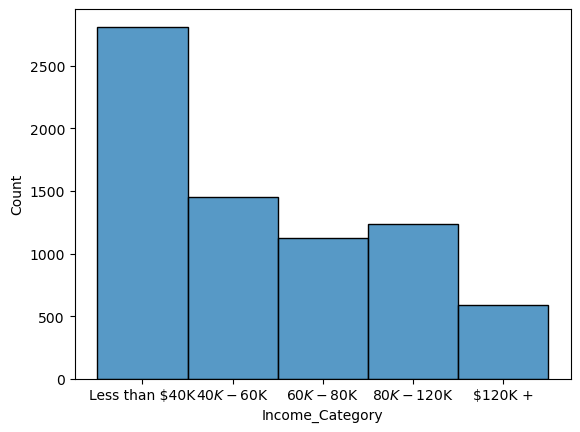

In [18]:
sns.histplot(data=bank_df , x='Income_Category')
plt.show()

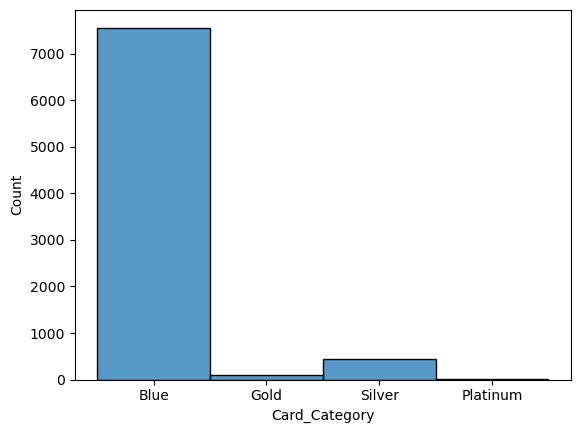

In [19]:
sns.histplot(data=bank_df , x='Card_Category')
plt.show()

Seems that most of the users currently subscribed to the bank are blue card holders, with a low income of less than 40k, somewhat distributed between married and single, mostly high school or college educated, and somewhat even distribution between male and female, with females slightly leading.

#### 2.6.3.3 Calculating Churn Rate<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

C:\Users\tpooz\AppData\Local\Temp\ipykernel_9108\519128048.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_df.corr()


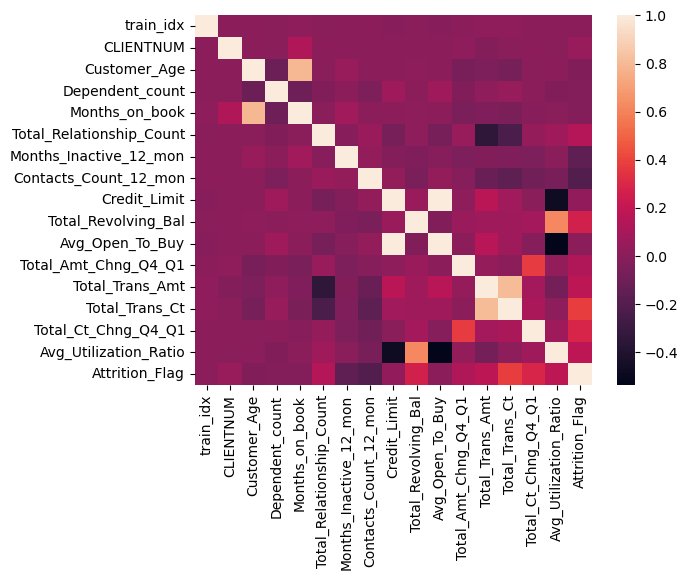

In [37]:
#Code task 12#
#Calculate what factors are leading to churn rate based on correlation heatmap
corr = bank_df.corr()
sns.heatmap(corr)
plt.show()

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [32]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


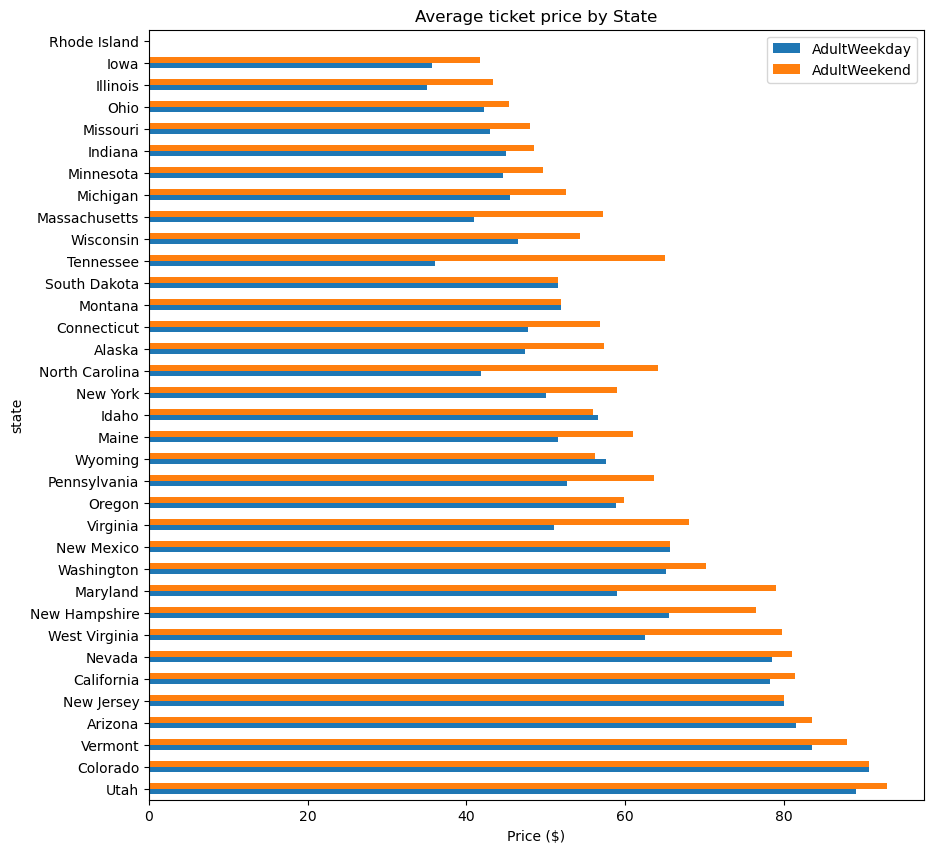

In [35]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

In [38]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state','AdultWeekday','AdultWeekend']], 
                        id_vars='state', 
                        var_name= 'Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [21]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
train_idx,8101.0,4.050000e+03,2.338702e+03,0.0,2.025000e+03,4.050000e+03,6.075000e+03,8.100000e+03
CLIENTNUM,8101.0,7.391329e+08,3.691912e+07,708082083.0,7.130534e+08,7.178860e+08,7.728464e+08,8.283431e+08
Customer_Age,8101.0,4.630638e+01,8.022527e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.000000e+01
Dependent_count,8101.0,2.334773e+00,1.289564e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,8101.0,3.592359e+01,8.024359e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,8101.0,3.813233e+00,1.551838e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,8101.0,2.346871e+00,1.014177e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,8101.0,2.450315e+00,1.100687e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,8101.0,8.636548e+03,9.086420e+03,1438.3,2.555000e+03,4.549000e+03,1.112800e+04,3.451600e+04
Total_Revolving_Bal,8101.0,1.160383e+03,8.155043e+02,0.0,3.260000e+02,1.273000e+03,1.782000e+03,2.517000e+03


Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

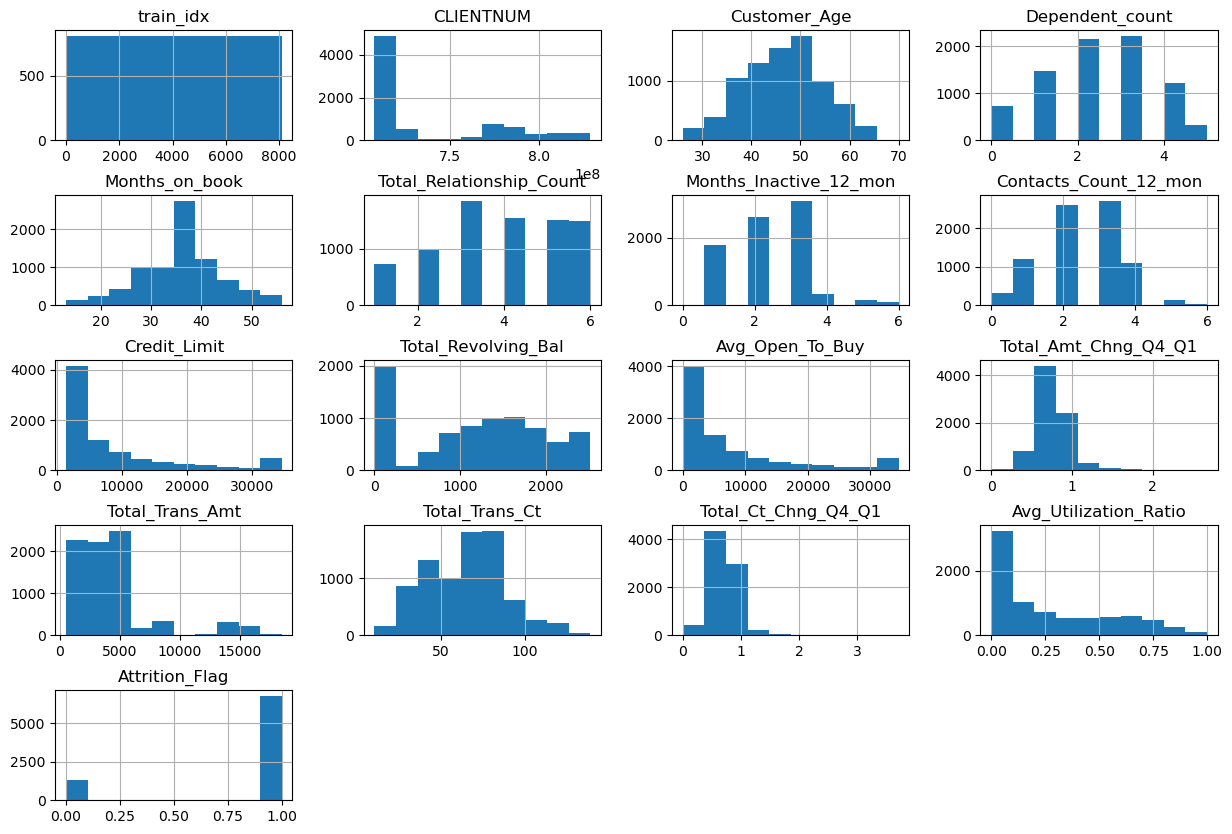

In [23]:
#Code statement below comes from ski_data project but used here to determine distribution of features as well.
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
bank_df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

In [72]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns='fastEight', inplace=True)
ski_data.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort,Yosemite Ski & Snowboard Area,Bear Mountain,Bear Valley,Boreal Mountain Resort,Dodge Ridge,...,Whitecap Mountain,Wilmot Mountain,Grand Targhee Resort,Hogadon Basin,Jackson Hole,Meadowlark Ski Lodge,Sleeping Giant Ski Resort,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area
Region,Alaska,Alaska,Alaska,Arizona,Arizona,Northern California,Sierra Nevada,Sierra Nevada,Sierra Nevada,Sierra Nevada,...,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
state,Alaska,Alaska,Alaska,Arizona,Arizona,California,California,California,California,California,...,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
summit_elev,3939,2600,2090,11500,11100,7800,8805,8500,7700,8200,...,1750,1030,9920,8000,10450,9500,7428,7808,9663,9500
vertical_drop,2500,1540,294,2300,1800,600,1665,1900,500,1600,...,400,230,2270,640,4139,1000,810,1571,990,1100
base_elev,250,1200,1796,9200,9200,7200,7140,6600,7200,6600,...,1295,800,7851,7400,6311,8500,6619,6237,8798,8400
trams,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
fastSixes,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
fastQuads,2,0,0,0,1,0,2,1,1,0,...,0,0,2,0,4,0,0,0,0,0
quad,2,0,0,2,2,0,1,0,1,1,...,1,3,2,0,4,0,0,1,0,0


##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

You have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using your business knowledge, you know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

If you want to add any features to your data that captures the state-wide market size, you should do this now, before dropping any more rows. In the next section, you'll drop rows with missing price information. Although you don't know what those resorts charge for their tickets, you do know the resorts exists and have been open for at least six years. Thus, you'll now calculate some state-wide summary statistics for later use.

Many features in your data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that you may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

When you think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. You might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows us to clearly perform the aggregations you want whilst also creating informative output column names.

In [83]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [84]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [88]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

C:\Users\tpooz\AppData\Local\Temp\ipykernel_19152\3001455144.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ski_data = ski_data[missing_price != 2]


In [90]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    96.085409
1     3.914591
dtype: float64

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

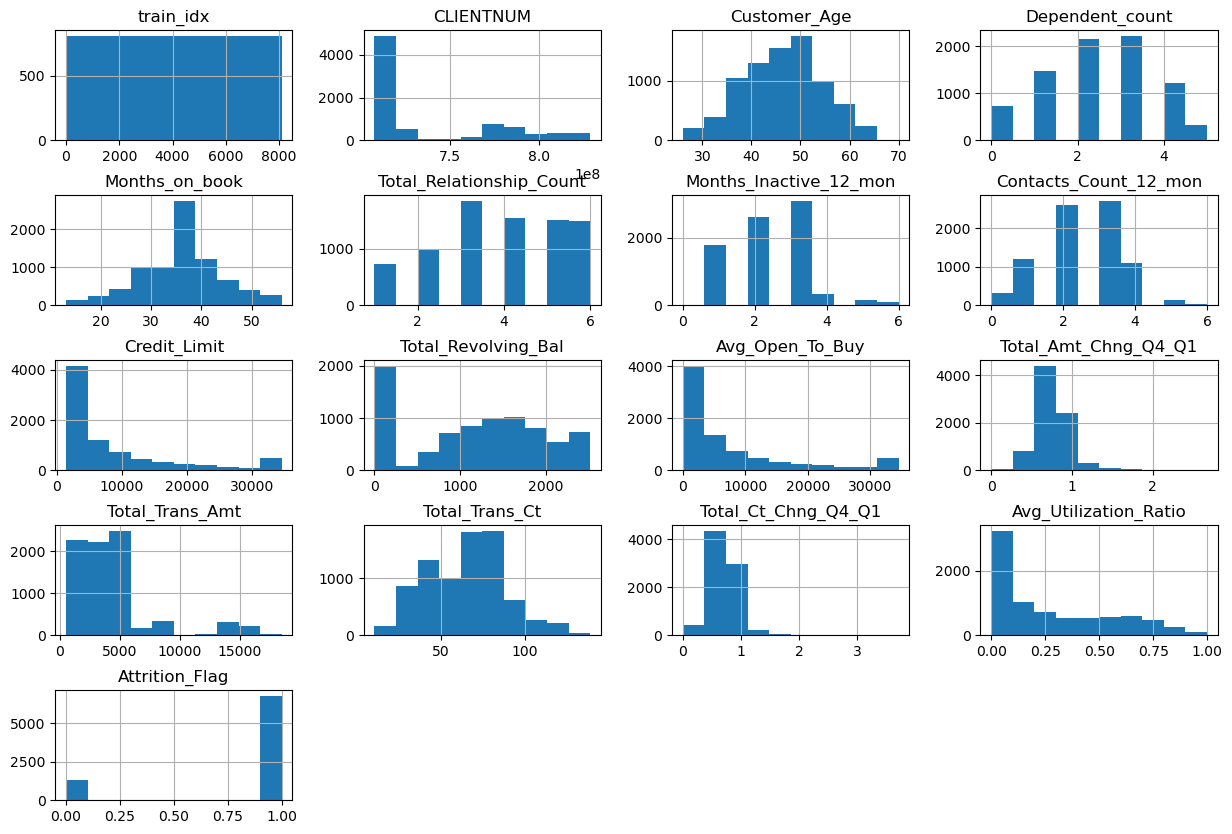

In [24]:
bank_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [98]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [99]:
type(usa_states)

list

In [100]:
len(usa_states)

1

In [101]:
usa_states = usa_states[0]
usa_states.head()

Name & postal abbs. [1]                                 Cities               \
  Name & postal abbs. [1] Name & postal abbs. [1].1      Capital   Largest[5]   
0                 Alabama                        AL   Montgomery   Birmingham   
1                  Alaska                        AK       Juneau    Anchorage   
2                 Arizona                        AZ      Phoenix      Phoenix   
3                Arkansas                        AR  Little Rock  Little Rock   
4              California                        CA   Sacramento  Los Angeles   

  Established[A] Population [B][3] Total area[4]          Land area[4]  \
  Established[A] Population [B][3]           mi2      km2          mi2   
0   Dec 14, 1819           4903185         52420   135767        50645   
1    Jan 3, 1959            731545        665384  1723337       570641   
2   Feb 14, 1912           7278717        113990   295234       113594   
3   Jun 15, 1836           3017804         53179   137732        52035   
4    Sep 9, 1850          39512223        163695   423967       155779   

           Water area[4]         Number of Reps.  
       km2           mi2     km2 Number of Reps.  
0   131171          1775    4597               7  
1  1477953         94743  245384               1  
2   294207           396    1026               9  
3   134771          1143    2961               4  
4   403466          7916   20501              53

Note, in even the last year, the capability of `pd.read_html()` has improved. The merged cells you see in the web table are now handled much more conveniently, with 'Phoenix' now being duplicated so the subsequent columns remain aligned. But check this anyway. If you extract the established date column, you should just get dates. Recall previously you used the `.loc` accessor, because you were using labels. Now you want to refer to a column by its index position and so use `.iloc`. For a discussion on the difference use cases of `.loc` and `.iloc` refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [102]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [103]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [104]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state','state_population','state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Do you have all the ski data states accounted for?

In [105]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

No?? 

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [106]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [107]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [108]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [109]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, on='state', how='left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. You will do this, but not now. In the next notebook you will be exploring the data, including the relationships between the states. For that you want a separate row for each state, as you have here, and joining the data this soon means you'd need to separate and eliminate redundances in the state data when you wanted it.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

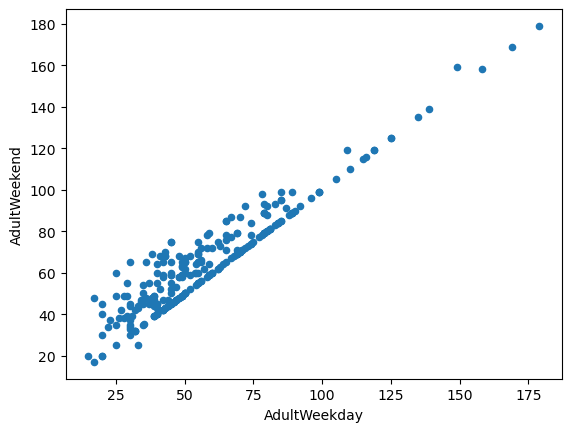

In [110]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [111]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [112]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [113]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [114]:
ski_data.shape

(277, 25)

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [115]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


These seem possibly curiously quantized...

In [116]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [117]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [118]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [25]:
bank_df.shape

(8101, 22)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [120]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

Directory ../data was created.
Writing file.  "../data\ski_data_cleaned.csv"


In [121]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

Writing file.  "../data\state_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** After an intial analysis and "cleaning" of the dataset provided by the Database manager Alesha Eisen, the shape has reduced from 330 rows with 27 columns to 277 rows with 25 columns. The resort of interest, Big Mountain Ski Resort, is within the dataset provided with no null values. The change in the original shape was to remove any resorts or rows from the dataset that had null values within their Adult Weekend and Adult Weekday Price columns. These rows were removed because the desired comparison in order to predict ticket price for Big Mountain Ski Resort is to see also other resorts and their respective ticket pricing. And from this intial analysis, it seems the "AdultWeekend" ticket price column would be the target feature in order to predict ticket as this had the least null values in its column. Another column dropped within the dataset was the fastEight column since over 50% were missing values. The Silverton Mountain Resort in Colorado's row data, after a wiki search, for the SkiableTerrain_ac column was modified in order to accurately reflect its actual skiable area of 1819 instead of 26819 acres. Another row value was removed from the dataset that had a row value for the yearOpen column of 2019. This row value was assumed to be the year the park opened and not how many years the park has been in service. Performing a boxplot for the intial dataset showed that it was hard to differentiate between which (Adult Weekday and Weekend) ticket prices would be a better indicator for a predictor of ticket price as prices of these column values were similar for Montana ski resorts. Also there are 33 instances were the "state" column differs from the "Region" column. This is because upon analysis region seems to be indicating a subset for specific states in the state column to provide a more accurate location of a resort within a state.  After "cleaning" the dataset, the number of missing values in rows were curiously quantized by multiples of 4. Also after "cleaning" the dataset, there are a few columns where the distribution is skewed where more values tend toward 0 namely fastQuads, fastSix, and Trams that will need to be explored further. Features of the dataset related to number of chairlifts were determined for this excercise as not relevant to the business question at hand as well as description of altitudes. Currently, now have a somewhat "cleaned" dataset where the relevant column to be explored further to determine ticket pricing has been deduced, the "AdultWeekend" price column, and all associated null value rows of this column have been removed in order perform a more comprehensive exploratory analysis.